In [184]:
# Visulisation details https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
# SSE (Sum of Square Error) = https://www.clusteranalysis4marketing.com/interpretation/sum-of-squared-error-sse/

# Plotting PCA
# plotting PCA (Principal Component Analysis) https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html
# TSNE - https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import ipywidgets as widgets
from collections import defaultdict

import string
import nltk
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud


In [4]:

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        #sse.append(KMeans(n_clusters=k, init='k-means++').fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    plt.show(block=True)

In [5]:
check_clusters = widgets.BoundedIntText(
 value=26,
 min=0,
 max=60,
 description='Maximum Clusters to Check:'
 )
display(check_clusters)

BoundedIntText(value=26, description='Maximum Clusters to Check:', max=60)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters


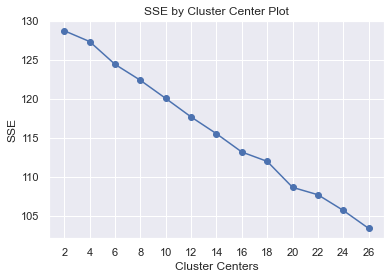

In [6]:

df = pd.read_csv('Data/CrisisLogger/crisislogger.csv')

new_df=df.drop(columns='upload_id').rename(columns={'transcriptions':'DATA_COLUMN'})

document = new_df['DATA_COLUMN'].to_numpy()


vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(document)

max_custers = check_clusters.value
find_optimal_clusters(X, max_custers)

In [15]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    plt.show(block=True)


In [154]:
cluster_count = widgets.BoundedIntText(
 value=8,
 min=0,
 max=60,
 description='Maximum Clusters to Check:'
 )
display(cluster_count)

BoundedIntText(value=8, description='Maximum Clusters to Check:', max=60)

In [155]:
    

#clusters = MiniBatchKMeans(n_clusters=cluster_count.value, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

model = KMeans(n_clusters=cluster_count.value, init='k-means++', max_iter=100, n_init=1)
clusters = model.fit(X)
predictedClusters = clusters.predict(X)



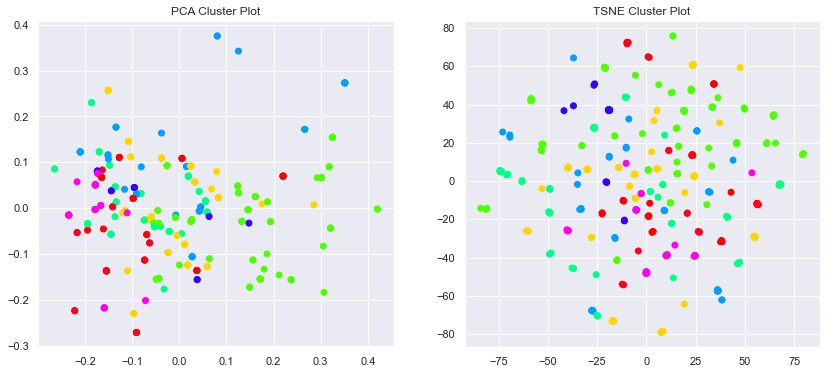

In [107]:
plot_tsne_pca(X, predictedClusters)

In [156]:

def get_matching_index(labels, match):   
    
    return np.where(labels == match)
        

In [157]:
    
def get_cluster_text(document, indexes):   
    
    returnValue = ""
    for index in indexes:        
        returnValue = returnValue + document[index]
        
    return " ".join(returnValue)
                   

In [158]:
def get_cluster_text_by_index(labels, index, document):   
    
    matching_indexes = get_matching_index(labels, index)
    return get_cluster_text(document, matching_indexes) 
    

In [159]:
def generate_word_cloud(text):   
    
    regular_punct = list(string.punctuation)
    regular_punct.append("'")


    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append("'m")
    stopwords.append("n't")
    stopwords.append("'s")
    stopwords.append("'re")
    
    tokens = word_tokenize(text)
    vocabulary = set(tokens)            
    tokens = [w.lower() for w in tokens if not w.lower() in stopwords and not w in regular_punct]
    frequency_dist = nltk.FreqDist(tokens)
     
    wordcloud = WordCloud()  
    wordcloud.generate_from_frequencies(frequency_dist)
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show(block=True)
        
    

In [180]:
def generate_word_bar(text):   
    
    regular_punct = list(string.punctuation)
    regular_punct.append("'")

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append("'m")
    stopwords.append("n't")
    stopwords.append("'s")
    stopwords.append("'re")
    
    tokens = word_tokenize(text)
    vocabulary = set(tokens)            
    tokens = [w.lower() for w in tokens if not w.lower() in stopwords and not w in regular_punct]
    frequency_dist = nltk.FreqDist(tokens)
    top_20 = frequency_dist.most_common(20)
    all_fdist = pd.Series(dict(top_20))
    ngram_sorted = {k:v for k,v in sorted(all_fdist.items(), key=lambda item:item[1], reverse=True)}
    
    ngram_freqdist = pd.Series(ngram_sorted)
        
    
    fig, ax = plt.subplots(figsize=(10,10))
    bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax, color='#5bc0de')
    plt.title('Frequency Distribution')
    plt.show(block=True);

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at rabindralamsal/finetuned-bertweet-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


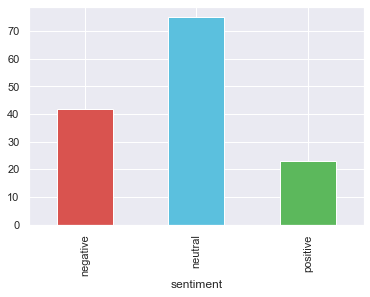

In [181]:
# BERT pretrained module: rabindralamsal/finetuned-bertweet-sentiment-analysis
# Use to get a sense of the sentiment of the transcriptions in the data
tokenizer = AutoTokenizer.from_pretrained("rabindralamsal/finetuned-bertweet-sentiment-analysis")
model = TFAutoModelForSequenceClassification.from_pretrained("rabindralamsal/finetuned-bertweet-sentiment-analysis")

sentiment_map = { 0:'negative', 1:'neutral', 2:'positive', 3:'unknown'}
def sentiment_score(transcription):
  if not transcription:
    return sentiment_map[3]
  tokens =  tokenizer.encode(transcription, padding=True, truncation=True, max_length=128, return_tensors="tf")
  result =  model.predict(tokens)[0]
  prediction = tf.nn.softmax(result, axis=1).numpy()
  sentiment = np.argmax(prediction)
  return sentiment_map[int(sentiment)]

def get_sentiment_score(df):    
    df['sentiment'] = df['transcriptions'].apply(lambda t: sentiment_score(t))
    df.groupby('sentiment')['transcriptions'].count().plot(kind='bar',color=['#d9534f','#5bc0de','#5cb85c', '#b8985c'])
    
get_sentiment_score(df)

In [183]:
def show_clusters_word_cloud(document, labels,wordcloud):
       
    options = ['select a cluster']
    
    for i in np.unique(labels):
        options.append(i)
        
    sel = widgets.Select(
     options=options,     
     rows=len(options),
     description='Cluster'
     )      

    
    output = widgets.Output()
    display(sel,output)    
    
    def on_value_change(change):
        with output:      
            
            if change['new'] != 'select a cluster':
                print('cluster' + str(change['new']) + ':')
                generate_word_cloud(get_cluster_text_by_index(labels,change['new'], document))
                generate_word_bar(get_cluster_text_by_index(labels,change['new'], document))
                        
                                            
    sel.observe(on_value_change, names='value')

show_clusters_word_cloud(document, predictedClusters,wordcloud)



Select(description='Cluster', options=('select a cluster', 0, 1, 2, 3, 4, 5), rows=7, value='select a cluster'…

Output()